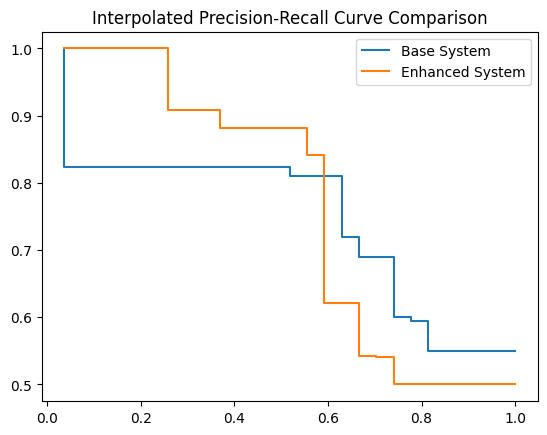

In [4]:
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt
import joblib
import pandas as pd

# Load the data for both systems
base_system = joblib.load('base_system/base_system.joblib')
enhanced_system = joblib.load('enhanced_system/enhanced_system.joblib')

fig, ax = plt.subplots()
plt.plot(*zip(*base_system))
plt.plot(*zip(*enhanced_system))
plt.legend(['Base System', 'Enhanced System'])
plt.title('Interpolated Precision-Recall Curve Comparison')
plt.savefig('comparison.png')
plt.show()




In [5]:
# read results from the csv file
# Replace 'base_system_results.csv' and 'enhanced_system_results.csv' with your file paths
base_system_df = pd.read_csv('base_system/results.csv', index_col=0)
enhanced_system_df = pd.read_csv('enhanced_system/results.csv', index_col=0)

# transpose the dataframes
base_system_df = base_system_df.T
enhanced_system_df = enhanced_system_df.T

# use first row of the dataframe as the column names
base_system_df.columns = base_system_df.iloc[0]
enhanced_system_df.columns = enhanced_system_df.iloc[0]

base_system_df = base_system_df.drop(base_system_df.index[0])
enhanced_system_df = enhanced_system_df.drop(enhanced_system_df.index[0])

# merge the two dataframes into one dataframe with columns "system" (base or enhanced), "Average Precision", and "Precision at 10 (P@10)"
merged_df = pd.concat([base_system_df, enhanced_system_df])

# Drop column "Metric"
merged_df = merged_df.drop(columns=['Metric'])

# Create column "System" and fill it with "Base System" and "Enhanced System"
merged_df['System'] = ['Base System', 'Enhanced System']

# Reorder the columns
merged_df = merged_df[['System', 'Average Precision', 'Precision at 10 (P@10)']]

#round the values in the 
merged_df['Average Precision'] = merged_df['Average Precision'].astype(float)
merged_df['Precision at 10 (P@10)'] = merged_df['Precision at 10 (P@10)'].astype(float)


# print the results
print(merged_df)

# export to comparison.tex
with open('comparison.tex', 'w') as tf:
    tf.write(merged_df.to_latex(index=False, escape=False, float_format="%.6f"))




0           System  Average Precision  Precision at 10 (P@10)
1      Base System           0.754945                     0.7
1  Enhanced System           0.858932                     0.9
